In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 6 - Dataset Titanic\\Titanic.csv')
print(df.head())  # Muestra las primeras filas del dataset
print(df.info())  # Información sobre las columnas

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [29]:
# Mostrar número de filas antes de eliminar valores atípicos
print(f"Filas antes de eliminar valores atípicos: {len(df)}")

# Calcular los límites utilizando el rango intercuartílico (IQR)
Q1 = df['Fare'].quantile(0.25)  # Primer cuartil
Q3 = df['Fare'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el dataframe para eliminar valores atípicos
df_cleaned = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]

# Mostrar número de filas después de eliminar valores atípicos
print(f"Filas después de eliminar valores atípicos: {len(df_cleaned)}")

# Mostrar resultados
print(f"Límites: Inferior={lower_limit}, Superior={upper_limit}")

Filas antes de eliminar valores atípicos: 891
Filas después de eliminar valores atípicos: 775
Límites: Inferior=-26.724, Superior=65.6344


In [41]:
# Manejo de valores faltantes para columnas presentes en tu DataFrame
df['Age'] = df['Age'].fillna(df['Age'].median())  # Rellenar valores faltantes en 'Age'

# Verificar si 'Embarked' existe antes de procesarla
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [45]:
# Mostrar las columnas disponibles
print("Columnas disponibles:", df.columns)

# Manejo de valores faltantes para las columnas relevantes
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Rellenar valores faltantes en 'Age'

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Rellenar valores faltantes en 'Embarked'

# Convertir variables categóricas a numéricas
if 'Sex' in df.columns:
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)  # Codificar 'Sex'

if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Codificar 'Embarked'

# Seleccionar características (modificar según las columnas existentes)
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Seleccionar la variable objetivo
y = df['Survived'] if 'Survived' in df.columns else None

# Verificar resultados
print("\nCaracterísticas seleccionadas (X):")
print(X.head())

if y is not None:
    print("\nVariable objetivo (y):")
    print(y.head())
else:
    print("\nVariable objetivo no encontrada en el dataset.")

Columnas disponibles: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Características seleccionadas (X):
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

Variable objetivo (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

# Variables X y y definidas previamente como se indicó en el paso anterior
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = df['Survived']

# Dividir el dataset en Train y Test (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos resultantes
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (623, 8)
Tamaño del conjunto de prueba: (268, 8)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo de regresión lineal
model = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión del modelo: {accuracy:.4f}')
print('\nReporte de clasificación:')
print(report)

Precisión del modelo: 0.8097

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Obtener probabilidades predichas
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Segunda columna: probabilidad de clase positiva

# Calcular MSE y R² (usando probabilidades)
mse = mean_squared_error(y_test, y_pred_proba)
r2 = r2_score(y_test, y_pred_proba)

# Mostrar resultados
print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinación (R²): {r2:.4f}')


Error Cuadrático Medio (MSE): 0.1324
Coeficiente de Determinación (R²): 0.4542


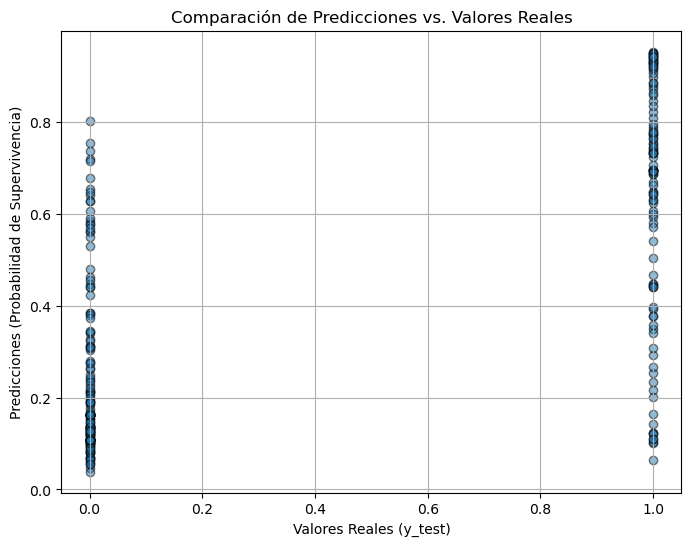

In [53]:
import matplotlib.pyplot as plt

# Realizar predicciones de probabilidad
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de supervivencia

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5, edgecolor='k')
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (Probabilidad de Supervivencia)")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.grid(True)
plt.show()


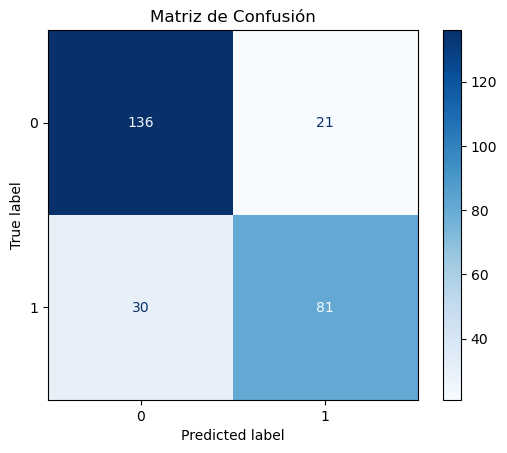

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo: Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Evaluar el modelo: Reporte de clasificación
report = classification_report(y_test, y_pred)

# Mostrar reporte de clasificación
print("Reporte de Clasificación:")
print(report)


In [57]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en características (X) y variable objetivo (y)
X = df.drop(columns=['Survived'])  # Características (excluyendo la columna objetivo)
y = df['Survived']  # Variable objetivo

# Dividir en conjuntos de entrenamiento (Train) y prueba (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 712 filas
Tamaño del conjunto de prueba: 179 filas


In [65]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['Name', 'Ticket', 'Cabin'], dtype='object')


In [67]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [71]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)


In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las mejores 5 características usando ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# Crear un DataFrame con las características y sus puntuaciones
selected_df = pd.DataFrame({'Feature': selected_features, 'Score': scores})
selected_df = selected_df.sort_values(by='Score', ascending=False)

print("Características seleccionadas:")
print(selected_df)


Características seleccionadas:
       Feature       Score
2     Sex_male  306.593249
0       Pclass   97.835853
1         Fare   58.314907
3   Embarked_S   23.546389
4  Ticket_1601    5.204197


Error cuadrático medio (MSE): 0.14
Coeficiente de determinación (R²): 0.39


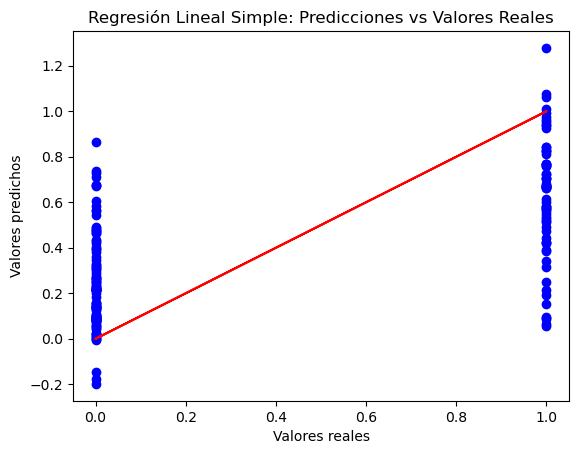

In [77]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión Lineal Simple: Predicciones vs Valores Reales')
plt.show()

In [79]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(class_report)

Matriz de confusión:
[[99 11]
 [18 51]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


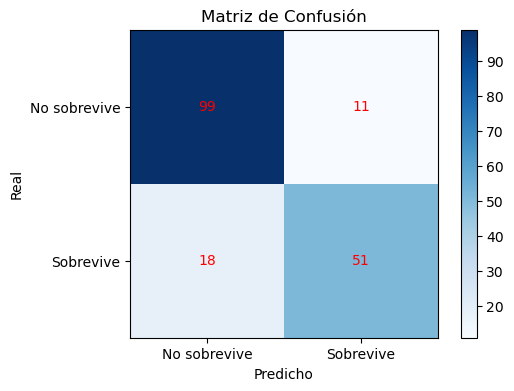

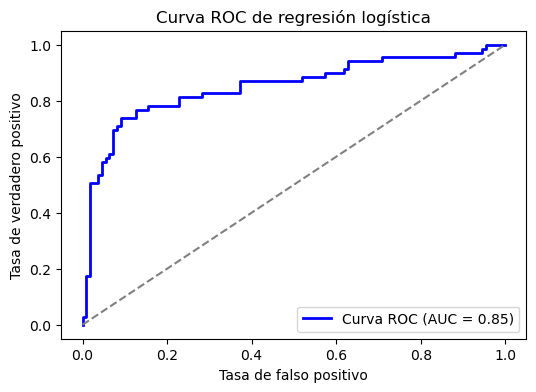

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Calcular las probabilidades de predicción
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No sobrevive', 'Sobrevive'])
plt.yticks(tick_marks, ['No sobrevive', 'Sobrevive'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.grid(False)
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

# Calcular curvas ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falso positivo')
plt.ylabel('Tasa de verdadero positivo')
plt.title('Curva ROC de regresión logística')
plt.legend(loc='lower right')
plt.show()


In [87]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


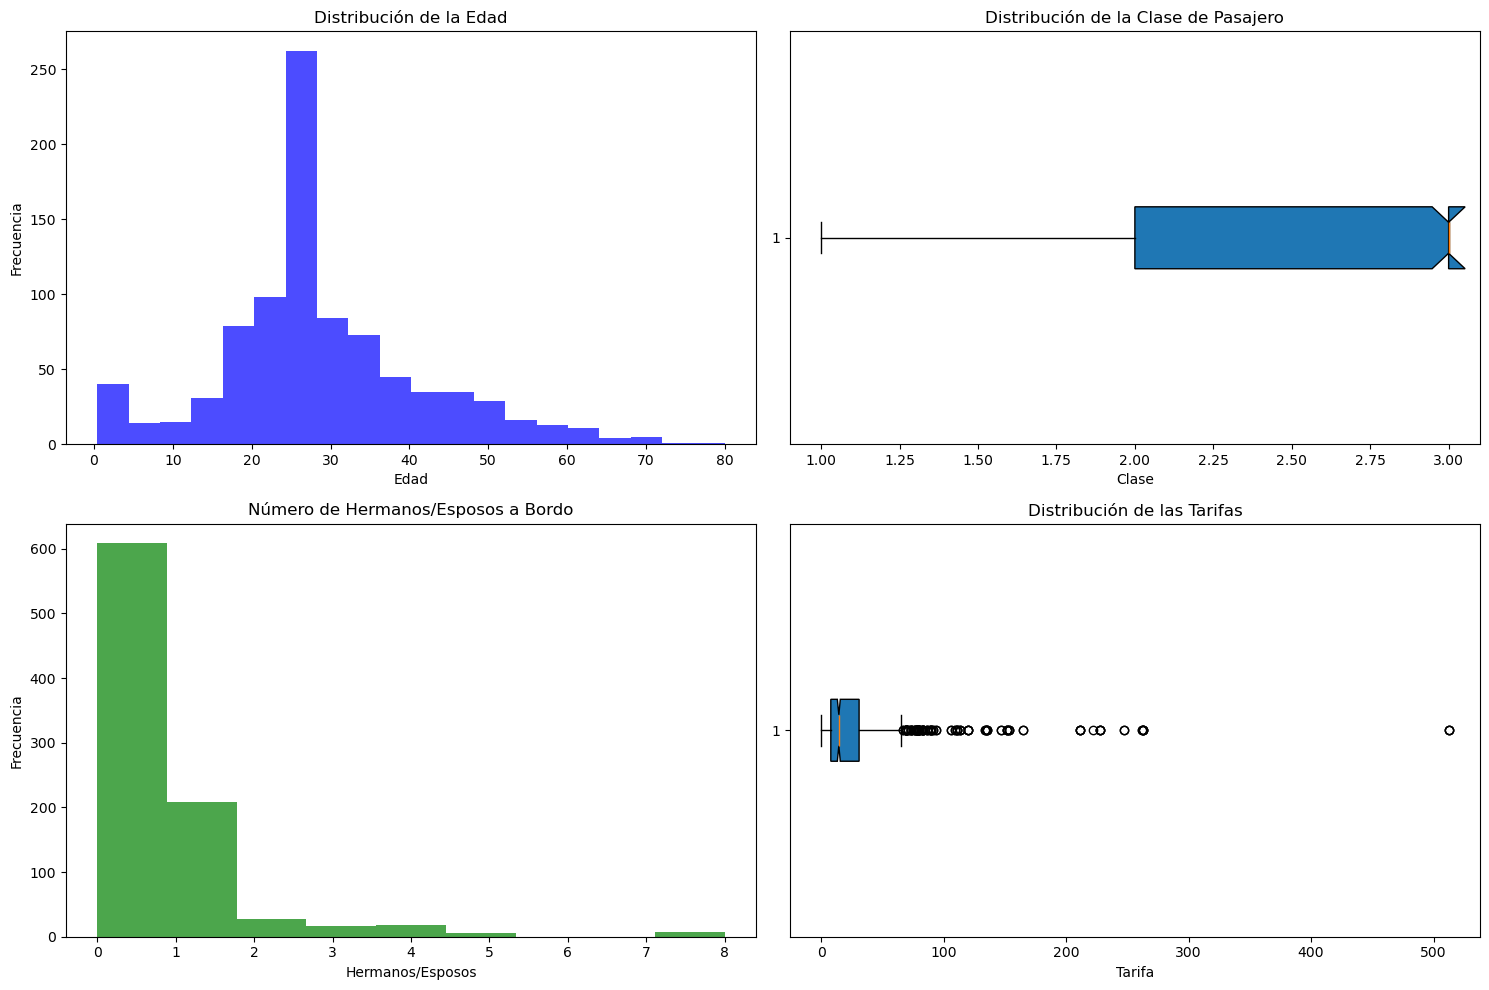

In [93]:
# Estadísticas descriptivas
stats = df.describe()

# Graficar las estadísticas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de las edades
axes[0, 0].hist(df['Age'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_title('Distribución de la Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Boxplot de la clase de pasajero
axes[0, 1].boxplot(df['Pclass'], vert=False, patch_artist=True, notch=True)
axes[0, 1].set_title('Distribución de la Clase de Pasajero')
axes[0, 1].set_xlabel('Clase')

# Histogramas de los hermanos/esposos a bordo
axes[1, 0].hist(df['SibSp'], bins=9, color='green', alpha=0.7)
axes[1, 0].set_title('Número de Hermanos/Esposos a Bordo')
axes[1, 0].set_xlabel('Hermanos/Esposos')
axes[1, 0].set_ylabel('Frecuencia')

# Boxplot de las tarifas
axes[1, 1].boxplot(df['Fare'], vert=False, patch_artist=True, notch=True)
axes[1, 1].set_title('Distribución de las Tarifas')
axes[1, 1].set_xlabel('Tarifa')

plt.tight_layout()
plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36436\3551283368.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36436\3551283368.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')


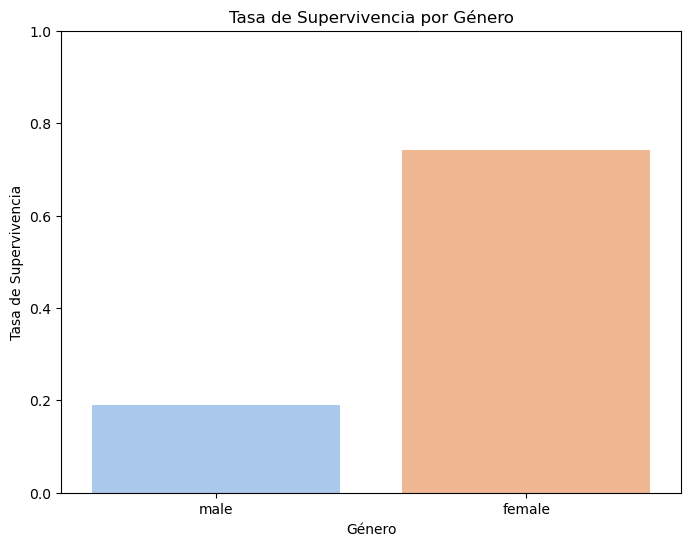

In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 6 - Dataset Titanic\\Titanic.csv')

# Verificar que los datos se cargaron correctamente
print(df.head())  # Muestra las primeras filas del dataset
print(df.info())  # Información sobre las columnas y los tipos de datos

# Continuar con el análisis o visualización
# Relación entre 'Sex' y 'Survived'
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

# Visualización
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
plt.title('Tasa de Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Tasa de Supervivencia')
plt.ylim(0, 1)
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36436\519263424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')


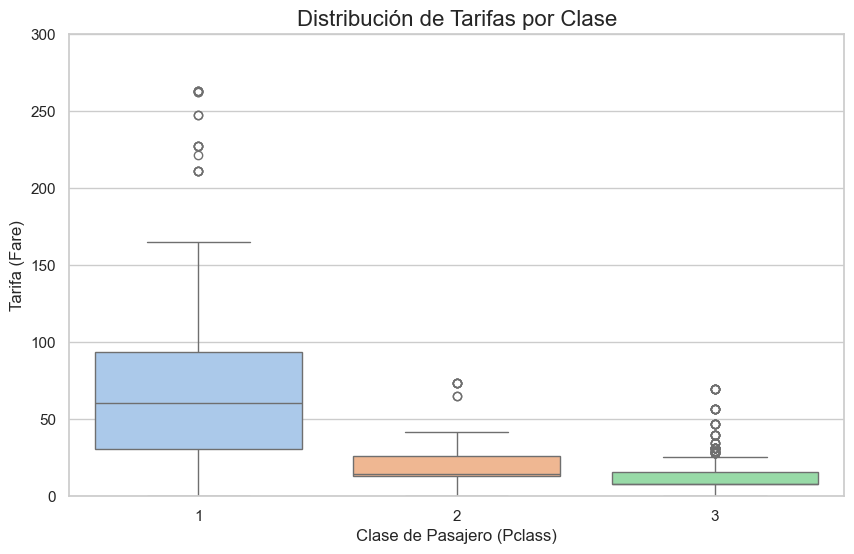

In [11]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')

# Personalizar el gráfico
plt.title('Distribución de Tarifas por Clase', fontsize=16)
plt.xlabel('Clase de Pasajero (Pclass)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.ylim(0, 300)  # Limitar el rango del eje Y para visualizar mejor
plt.show()

Optimization terminated successfully.
         Current function value: 0.597821
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.1023
Time:                        07:38:21   Log-Likelihood:                -532.66
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.484e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6287      0.534     -1.177      0.239      -1.676       0.418
Pclass        -0.5228      0.

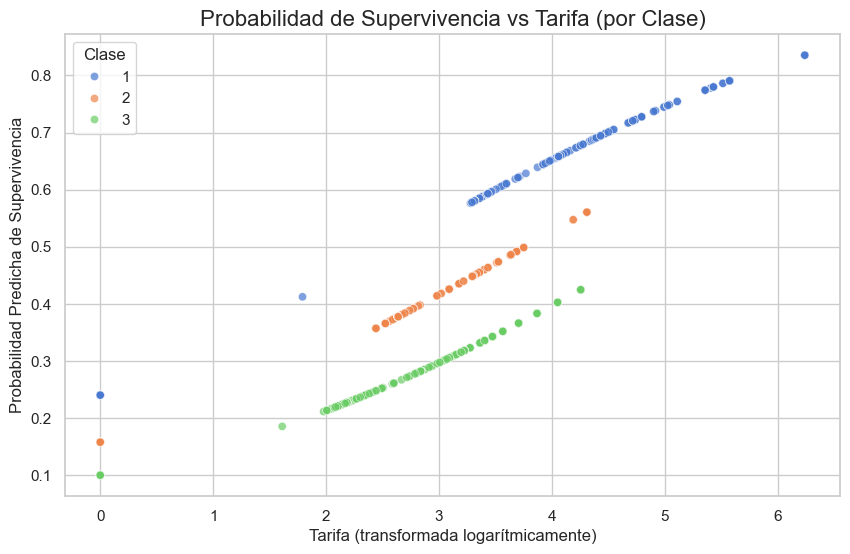

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

# Cargar los datos
df = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 6 - Dataset Titanic\\Titanic.csv')

# Preprocesar los datos
# Eliminar filas con valores nulos en las columnas relevantes
df = df[['Pclass', 'Fare', 'Survived']].dropna()

# Escalar la columna 'Fare' para evitar problemas de escala
df['Fare'] = np.log1p(df['Fare'])  # Log transform para reducir el impacto de valores extremos

# Definir variables independientes (X) y dependiente (y)
X = df[['Pclass', 'Fare']]
y = df['Survived']

# Agregar una constante para el modelo de statsmodels
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# Visualización de las probabilidades predichas
# Crear un DataFrame para predicciones
df['Predicted_Prob'] = logit_model.predict(X)

# Visualización con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Predicted_Prob', hue='Pclass', data=df, palette='muted', alpha=0.7)
plt.title('Probabilidad de Supervivencia vs Tarifa (por Clase)', fontsize=16)
plt.xlabel('Tarifa (transformada logarítmicamente)', fontsize=12)
plt.ylabel('Probabilidad Predicha de Supervivencia', fontsize=12)
plt.legend(title='Clase')
plt.show()
